In [1]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Loading dataset
df = pd.read_csv("sandwich.csv")
df['bread'] = df['bread'].str.strip()
df['topping'] = df['topping'].str.strip()
df['butter'] = df['butter'].str.strip().str.lower()

# Creating combined condition column for 3-way combination
df['condition'] = df['bread'] + " | " + df['topping'] + " | " + df['butter']

# Tukey HSD test
tukey = pairwise_tukeyhsd(endog=df['antCount'],
                          groups=df['condition'],
                          alpha=0.05)

print(tukey)

tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tukey_df.to_csv("tukey_results.csv", index=False)


c:\Users\vishwa\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------------------------------
 Multi Grain | Ham and gherkins | no Multi Grain | Ham and gherkins | yes     22.0 0.8075 -17.7331 61.7331  False
 Multi Grain | Ham and gherkins | no     Multi Grain | Peanut butter | no    -27.0 0.4979 -66.7331 12.7331  False
 Multi Grain | Ham and gherkins | no    Multi Grain | Peanut butter | yes      6.0    1.0 -33.7331 45.7331  False
 Multi Grain | Ham and gherkins | no      Multi Grain | Yeast spread | no     -7.5    1.0 -47.2331 32.2331  False
 Multi Grain | Ham and gherkins | no     Multi Grain | Yeast spread | yes    -20.5 0.8789 -60.2331 19.2331  False
 Multi Grain | Ham and gherkins | no          Rye | Ham and gherkins | no      2.0    1.

In [3]:
print(df_avg.sort_values("antCount", ascending=False))


                               condition  antCount
1   Multi Grain | Ham and gherkins | yes      69.5
13        White | Ham and gherkins | yes      66.0
19  Whole Grain | Ham and gherkins | yes      62.5
21     Whole Grain | Peanut butter | yes      54.0
3      Multi Grain | Peanut butter | yes      53.5
8               Rye | Peanut butter | no      53.0
18   Whole Grain | Ham and gherkins | no      50.5
11              Rye | Yeast spread | yes      49.5
6            Rye | Ham and gherkins | no      49.5
7           Rye | Ham and gherkins | yes      49.5
12         White | Ham and gherkins | no      49.0
0    Multi Grain | Ham and gherkins | no      47.5
23      Whole Grain | Yeast spread | yes      44.0
14            White | Peanut butter | no      42.0
4        Multi Grain | Yeast spread | no      40.0
9              Rye | Peanut butter | yes      39.0
15           White | Peanut butter | yes      38.5
17            White | Yeast spread | yes      33.5
22       Whole Grain | Yeast sp

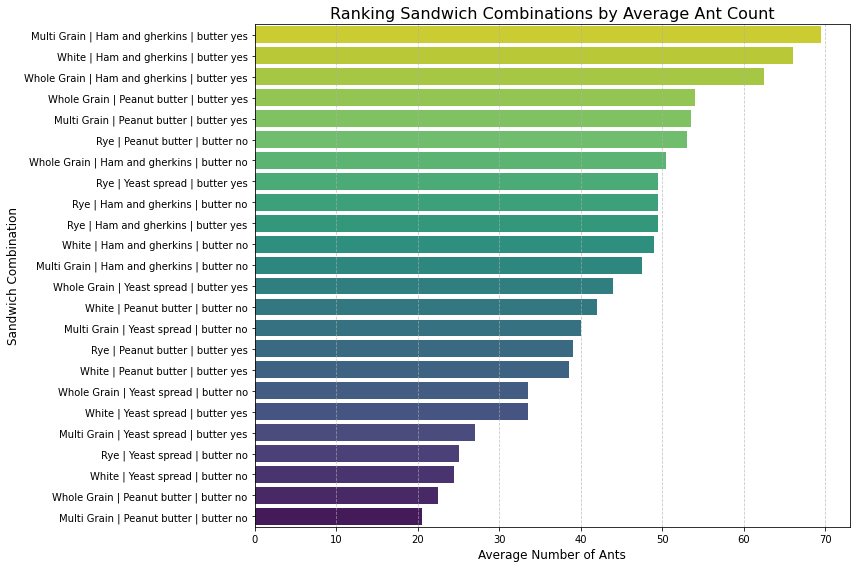

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_ant_counts = df.groupby(['bread', 'topping', 'butter'])['antCount'].mean().reset_index()
avg_ant_counts['condition'] = avg_ant_counts['bread'] + ' | ' + \
                              avg_ant_counts['topping'] + ' | butter ' + \
                              avg_ant_counts['butter']

top_10_combinations = avg_ant_counts.sort_values(by='antCount', ascending=True)

# Step 4: Create the horizontal bar plot for the top 10 combinations
plt.figure(figsize=(12, 8)) # Increase figure size for better readability, especially for long labels
sns.barplot(data=top_10_combinations, x="antCount", y="condition", palette="viridis")

# Add informative titles and labels
plt.title("Ranking Sandwich Combinations by Average Ant Count", fontsize=16)
plt.xlabel("Average Number of Ants", fontsize=12)
plt.ylabel("Sandwich Combination", fontsize=12)

# Improve readability of ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a grid for easier value reading
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to display the highest value at the top, which is conventional for "top N" charts.
plt.gca().invert_yaxis()

# Ensure all labels and titles fit within the figure area
plt.tight_layout()

# Display the plot
plt.show()


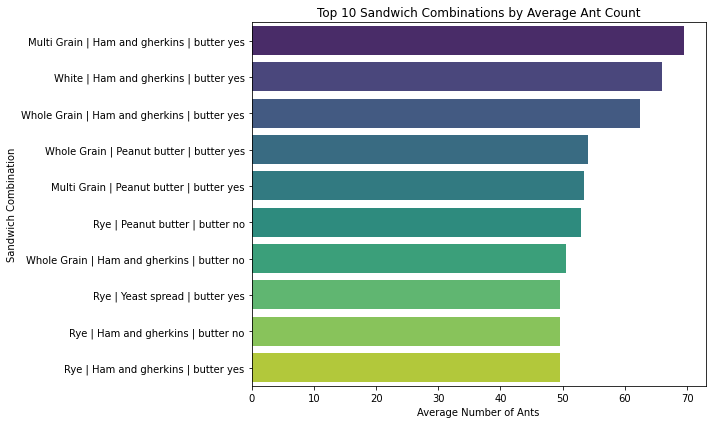

In [14]:
# Plot top 10
plt.figure(figsize=(10, 6))
top_10_combinations = avg_ant_counts.sort_values(by='antCount', ascending=False)
sns.barplot(data=top_10_combinations.head(10), x="antCount", y="condition", palette="viridis")

plt.title("Top 10 Sandwich Combinations by Average Ant Count")
plt.xlabel("Average Number of Ants")
plt.ylabel("Sandwich Combination")
plt.tight_layout()
plt.show()


In [2]:
# Filter Tukey for only significant comparisons
sig_pairs = tukey_df[tukey_df['reject'] == True].sort_values("p-adj")
print(sig_pairs[['group1', 'group2', 'meandiff', 'p-adj']])


                                   group1  \
23   Multi Grain | Ham and gherkins | yes   
41   Multi Grain | Ham and gherkins | yes   
55       Multi Grain | Peanut butter | no   
37   Multi Grain | Ham and gherkins | yes   
31   Multi Grain | Ham and gherkins | yes   
227        White | Ham and gherkins | yes   
26   Multi Grain | Ham and gherkins | yes   
61       Multi Grain | Peanut butter | no   
223        White | Ham and gherkins | yes   
187               Rye | Yeast spread | no   
266  Whole Grain | Ham and gherkins | yes   

                                   group2  meandiff   p-adj  
23       Multi Grain | Peanut butter | no     -49.0  0.0059  
41       Whole Grain | Peanut butter | no     -47.0  0.0095  
55         White | Ham and gherkins | yes      45.5  0.0135  
37              White | Yeast spread | no     -45.0  0.0152  
31                Rye | Yeast spread | no     -44.5  0.0171  
227      Whole Grain | Peanut butter | no     -43.5  0.0215  
26       Multi Grain | Ye